In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

In [175]:
plt.style.use('fivethirtyeight') 

In [176]:
orders = pd.read_csv("data/orders.csv", dayfirst=True, header=1)
process = pd.read_csv("data/order-process.csv", dayfirst=True,)
intern = pd.read_csv("data/intern.csv", dayfirst=True,)
campaign = pd.read_csv("data/campaign.csv", dayfirst=True,)
orders.head()
process.head()
# intern.head()
# campaign.head()
campaign.shape


(333, 3)

In [233]:
# lowercasing the titles
# df.columns.str.lower()
orders.rename(columns=lambda x : x.lower(), inplace=True)
process.rename(columns=lambda x : x.lower(), inplace=True)
intern.rename(columns=lambda x : x.lower(), inplace=True)
campaign.rename(columns=lambda x : x.lower(), inplace=True)
campaign.head()


,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
...,...,...,...,...,...
5894,908,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5895,909,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5896,1297,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing
5897,1298,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing


In [178]:
# replacing spaces with '_':
orders.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
intern.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
process.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
campaign.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)


In [179]:
# to change the day formatting

intern['ready_to_ship_date'] = pd.to_datetime(intern['ready_to_ship_date'], format='%d/%m/%Y')
intern['pickup_date'] = pd.to_datetime(intern['pickup_date'], format='%d/%m/%Y')
intern.head()
orders['order_date'] = pd.to_datetime(orders['order_date'], format='%d/%m/%Y')
orders_clean = orders[['index','order_id', 'order_date', 'postal_code', 'state']]
orders_clean.head()



,index,order_id,order_date,postal_code,state
0,27,CA-2019-121755,2019-01-16,90049.0,California
1,45,CA-2019-118255,2019-03-11,55122.0,Minnesota
2,48,CA-2019-169194,2019-06-20,19901.0,Delaware
3,60,CA-2019-111682,2019-06-17,12180.0,New York
4,63,CA-2018-135545,2018-11-24,90004.0,California


In [180]:
campaign['arrival_scan_date'] = pd.to_datetime(campaign['arrival_scan_date'], format='%d/%m/%Y')
campaign.head()
process['order_date'] = pd.to_datetime(process['order_date'], dayfirst=True)
process['on_truck_scan_date'] = pd.to_datetime(process['on_truck_scan_date'], dayfirst=True)
process.head(20)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
5,8606,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
6,9494,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing
7,9495,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing
8,5868,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing
9,5869,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing


In [181]:
#to remove duplicates in intern data
intern[intern.duplicated(keep=False)].sort_values(by='order_id')
intern_cleaned = intern.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
#to merge non-duplicated intern with orders
orders_intern = pd.merge(orders_clean, intern_cleaned)
orders_intern[orders_intern.duplicated(keep=False)].sort_values(by='order_id')





,index,order_id,order_date,postal_code,state,ready_to_ship_date,pickup_date


In [182]:
# to merge orders and process
orders_process = pd.merge(orders_clean, process, on='order_id')
orders_process


,index,order_id,order_date_x,postal_code,state,row_id,order_date_y,on_truck_scan_date,ship_mode
0,27,CA-2019-121755,2019-01-16,90049.0,California,26,2019-01-16,2019-01-23,Standard Processing
1,27,CA-2019-121755,2019-01-16,90049.0,California,27,2019-01-16,2019-01-23,Standard Processing
2,26,CA-2019-121755,2019-01-16,90049.0,California,26,2019-01-16,2019-01-23,Standard Processing
3,26,CA-2019-121755,2019-01-16,90049.0,California,27,2019-01-16,2019-01-23,Standard Processing
4,45,CA-2019-118255,2019-03-11,55122.0,Minnesota,45,2019-03-11,2019-03-13,Express
...,...,...,...,...,...,...,...,...,...
17520,9463,US-2020-109610,2020-11-25,40214.0,Kentucky,9463,2020-11-25,2020-12-02,Standard Processing
17521,9760,CA-2019-146913,2019-10-31,94109.0,California,9760,2019-10-31,2019-11-06,Standard Processing
17522,9808,CA-2020-107209,2020-07-27,27604.0,North Carolina,9808,2020-07-27,2020-08-05,Standard Processing
17523,9830,US-2020-152842,2020-07-16,28205.0,North Carolina,9830,2020-07-16,2020-07-24,Standard Processing


In [344]:
#to merge orders and campaign
orders_campaign = pd.merge(orders_clean, campaign)
orders_campaign['order_arrival_diff'] = orders_campaign['arrival_scan_date'] - orders_campaign['order_date']
orders_campaign.drop(columns='index', inplace = True)
orders_campaign.head()

orders_campaign[orders_campaign.duplicated(keep=False)].sort_values(by='order_id')
orders_campaign.drop_duplicates(subset=None, keep='first', inplace=True)

orders_campaign.drop(columns='customer_name', inplace=True)
# orders.query('order_id == "CA-2019-145625"')
orders_campaign['bday'] = [len(pd.bdate_range(orders_campaign['order_date'][i], orders_campaign['arrival_scan_date'][i])) - 1 for i in orders_campaign.index.values]

orders_campaign['is_delayed'] = np.where(orders_campaign['bday'] > 7, 'yes', 'no')
orders_campaign['is_delayed'].value_counts()
orders_campaign.loc[:, ['order_id','order_date','arrival_scan_date','order_arrival_diff','bday', 'is_delayed']]



,order_id,order_date,arrival_scan_date,order_arrival_diff,bday,is_delayed
0,CA-2019-145625,2019-09-11,2019-09-23,12 days,8,yes
2,CA-2019-162138,2019-04-23,2019-05-06,13 days,9,yes
4,CA-2019-169166,2019-05-09,2019-05-20,11 days,7,no
5,CA-2020-131954,2020-01-21,2020-02-03,13 days,9,yes
11,CA-2019-102981,2019-09-06,2019-09-16,10 days,6,no
...,...,...,...,...,...,...
663,CA-2020-135076,2020-04-13,2020-04-27,14 days,10,yes
664,CA-2019-109400,2019-05-02,2019-05-13,11 days,7,no
665,CA-2019-113341,2019-11-25,2019-12-09,14 days,10,yes
666,CA-2019-162159,2019-09-16,2019-09-23,7 days,5,no


In [212]:
# to merge intern and orders
order_intern = pd.merge(intern_cleaned, orders_clean)
#to create a new column as ready_to_ship_length
order_intern['ready_to_ship_length'] = order_intern['ready_to_ship_date'] - order_intern['order_date']
# order_intern.sort_values(by='ready_to_ship_length')
order_intern.groupby('ready_to_ship_length').count()
# order_intern['ready_to_ship_length'].count()







,order_id,ready_to_ship_date,pickup_date,index,order_date,postal_code,state,ready_to_ship_length
0,CA-2019-116540,2019-09-02,2019-09-03,3416,2019-09-02,53711.0,Wisconsin,0 days
1,CA-2019-116540,2019-09-02,2019-09-03,3417,2019-09-02,53711.0,Wisconsin,0 days
2,CA-2019-129847,2019-09-04,2019-09-04,6937,2019-09-02,60653.0,Illinois,2 days
3,CA-2019-129630,2019-09-04,2019-09-04,9930,2019-09-04,94122.0,California,0 days
4,CA-2019-129630,2019-09-04,2019-09-04,9929,2019-09-04,94122.0,California,0 days
...,...,...,...,...,...,...,...,...
413,CA-2020-105333,2020-12-04,2020-12-07,5585,2020-11-30,10011.0,New York,4 days
414,CA-2020-105333,2020-12-04,2020-12-07,5587,2020-11-30,10011.0,New York,4 days
415,CA-2020-119305,2020-12-04,2020-12-07,956,2020-11-30,39212.0,Mississippi,4 days
416,CA-2020-142090,2020-12-07,2020-12-09,5066,2020-11-30,27217.0,North Carolina,7 days


Text(0.5, 1.0, 'On-Time Shipping')

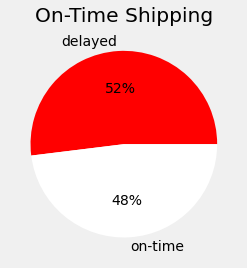

In [229]:
# sns.countplot(x=orders_campaign['is_delayed'])
plt.pie(orders_campaign['is_delayed'].value_counts(), labels=['delayed', 'on-time'], colors=['red', 'white'], autopct='%.0f%%');
plt.title('On-Time Shipping')

In [216]:

# order_intern['order_weekday'] = order_intern['order_date'].map(lambda x : x.weekday())
# order_intern['ready_to_ship_weekday'] = order_intern['ready_to_ship_date'].map(lambda x : x.weekday())
# order_intern.drop(columns='postal_code', inplace=True)
# order_intern['ship_length'] = order_intern['ready_to_ship_length'].map(lambda x : x.days)
# order_intern['through_weekend'] = np.where((order_intern['ship_length'] > 5) | (order_intern['ready_to_ship_weekday'] < order_intern['order_weekday']), 'yes', 'no')
# order_intern['business_day'] = np.where(order_intern['through_weekend'] == 'yes', order_intern['ship_length'] - 2, order_intern['ship_length'])
# order_intern.drop(columns ='state', inplace= True)
# order_intern

In [283]:
# len(pd.bdate_range('2011-01-05', '2011-01-25'))
order_intern['bday'] = [len(pd.bdate_range(order_intern['order_date'][i], order_intern['ready_to_ship_date'][i])) - 1 for i in order_intern.index.values]
order_intern['bday'].mean()


2.777511961722488

In [ ]:
# order_intern['ready_to_ship_length'] = order_intern['ready_to_ship_length'].apply(lambda x: x.value)

In [342]:
# order_intern['ready_to_ship_length'] = order_intern['ready_to_ship_length']
order_intern['is_delayed'] = np.where(order_intern['bday'] > 2, 'yes', 'no')
# order_intern
order_intern.loc[:,['order_id', 'ready_to_ship_date', 'order_date', 'ready_to_ship_length', 'bday', 'is_delayed']]
# Report_Card.loc[:,["Lectures","Grades"]]

,order_id,ready_to_ship_date,order_date,ready_to_ship_length,bday,is_delayed
0,CA-2019-116540,2019-09-02,2019-09-02,0 days,0,no
1,CA-2019-116540,2019-09-02,2019-09-02,0 days,0,no
2,CA-2019-129847,2019-09-04,2019-09-02,2 days,2,no
3,CA-2019-129630,2019-09-04,2019-09-04,0 days,0,no
4,CA-2019-129630,2019-09-04,2019-09-04,0 days,0,no
...,...,...,...,...,...,...
413,CA-2020-105333,2020-12-04,2020-11-30,4 days,4,yes
414,CA-2020-105333,2020-12-04,2020-11-30,4 days,4,yes
415,CA-2020-119305,2020-12-04,2020-11-30,4 days,4,yes
416,CA-2020-142090,2020-12-07,2020-11-30,7 days,5,yes


Text(0.5, 1.0, 'On-Time Process within Copmany')

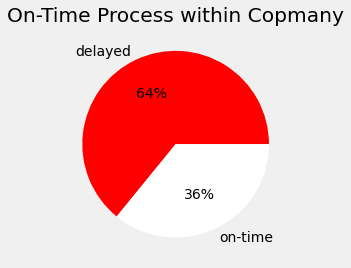

In [231]:
plt.pie(order_intern['is_delayed'].value_counts(), labels=['delayed', 'on-time'], colors=['red', 'white'], autopct='%.0f%%');
plt.title('On-Time Process within Copmany')

In [328]:
order_intern_process = pd.merge(order_intern, process)
order_intern_process
# order_intern_process.drop(columns='postal_code', 'state', inplace=True)
order_intern_process.groupby(['ship_mode', 'is_delayed']).count().reset_index()
# order_intern_process



,ship_mode,is_delayed,order_id,ready_to_ship_date,pickup_date,index,order_date,postal_code,state,ready_to_ship_length,bday,row_id,on_truck_scan_date
0,Express,no,229,229,229,229,229,229,229,229,229,229,229
1,Express,yes,57,57,57,57,57,57,57,57,57,57,57
2,Standard Processing,no,181,181,181,181,181,181,181,181,181,181,181
3,Standard Processing,yes,753,753,753,753,753,753,753,753,753,753,753


<AxesSubplot:xlabel='ship_mode'>

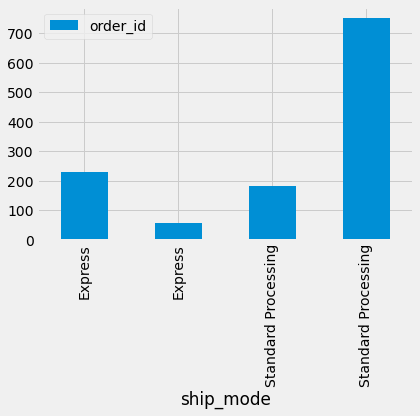

In [326]:
order_intern_process.groupby(['ship_mode', 'is_delayed']).count().reset_index().plot(kind= 'bar', x= 'ship_mode', y='order_id')
# sns.barplot(date=order_intern_process.groupby(['ship_mode', 'is_delayed']).count().reset_index(), x=['ship_mode', 'is_delayed'], y= 'order_id')

In [315]:
pd.pivot_table(order_intern_process.groupby(['ship_mode', 'is_delayed']).count().reset_index(),
                index='is_delayed',
                columns='ship_mode',
                aggfunc=max,
                fill_value=0)

bday                       index                      \
ship_mode  Express Standard Processing Express Standard Processing   
is_delayed                                                           
no             229                 181     229                 181   
yes             57                 753      57                 753   

           on_truck_scan_date                     order_date  \
ship_mode             Express Standard Processing    Express   
is_delayed                                                     
no                        229                 181        229   
yes                        57                 753         57   

                               order_id                      ... postal_code  \
ship_mode  Standard Processing  Express Standard Processing  ...     Express   
is_delayed                                                   ...               
no                         181      229                 181  ...         229   
yes                        753       57                 753  ...          57   

                               ready_to_ship_date                      \
ship_mode  Standard Processing            Express Standard Processing   
is_delayed                                                              
no                         181                229                 181   
yes                        753                 57                 753   

           ready_to_ship_length                      row_id  \
ship_mode               Express Standard Processing Express   
is_delayed                                                    
no                          229                 181     229   
yes                          57                 753      57   

                                 state                      
ship_mode  Standard Processing Express Standard Processing  
is_delayed                                                  
no                         181     229                 181  
yes                        753      57                 753  

[2 rows x 22 columns]

In [311]:
order_intern_process.query('ship_mode == "Express"')['']

,order_id,ready_to_ship_date,pickup_date,index,order_date,postal_code,state,ready_to_ship_length,bday,is_delayed,row_id,on_truck_scan_date,ship_mode
0,CA-2019-116540,2019-09-02,2019-09-03,3416,2019-09-02,53711.0,Wisconsin,0 days,0,no,3416,2019-09-03,Express
1,CA-2019-116540,2019-09-02,2019-09-03,3416,2019-09-02,53711.0,Wisconsin,0 days,0,no,3417,2019-09-03,Express
2,CA-2019-116540,2019-09-02,2019-09-03,3417,2019-09-02,53711.0,Wisconsin,0 days,0,no,3416,2019-09-03,Express
3,CA-2019-116540,2019-09-02,2019-09-03,3417,2019-09-02,53711.0,Wisconsin,0 days,0,no,3417,2019-09-03,Express
4,CA-2019-129847,2019-09-04,2019-09-04,6937,2019-09-02,60653.0,Illinois,2 days,2,no,6937,2019-09-04,Express
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,CA-2020-135307,2020-11-27,2020-11-27,512,2020-11-26,64118.0,Missouri,1 days,1,no,512,2020-11-27,Express
1044,CA-2020-135307,2020-11-27,2020-11-27,511,2020-11-26,64118.0,Missouri,1 days,1,no,511,2020-11-27,Express
1045,CA-2020-135307,2020-11-27,2020-11-27,511,2020-11-26,64118.0,Missouri,1 days,1,no,512,2020-11-27,Express
1047,CA-2020-123701,2020-11-27,2020-11-27,4765,2020-11-24,94110.0,California,3 days,3,yes,4765,2020-11-27,Express


In [280]:
order_intern_process['truck_bday'] =[len(pd.bdate_range(order_intern_process['ready_to_ship_date'][i], order_intern_process['on_truck_scan_date'][i])) - 1 for i in order_intern_process.index.values]
order_intern_process.truck_bday.max()

3

In [255]:
total = pd.merge(order_intern_process, orders_campaign, on='order_id')
total

,order_id,ready_to_ship_date,pickup_date,index,order_date_x,postal_code_x,state_x,ready_to_ship_length,bday_x,is_delayed_x,...,on_truck_scan_date,ship_mode,truck_bday,order_date_y,postal_code_y,state_y,arrival_scan_date,order_arrival_diff,bday_y,is_delayed_y
0,CA-2019-129847,2019-09-04,2019-09-04,6937,2019-09-02,60653.0,Illinois,2 days,2,no,...,2019-09-04,Express,0,2019-09-02,60653.0,Illinois,2019-09-10,8 days,6,no
1,CA-2019-129630,2019-09-04,2019-09-04,9930,2019-09-04,94122.0,California,0 days,0,no,...,2019-09-04,Express,0,2019-09-04,94122.0,California,2019-09-09,5 days,3,no
2,CA-2019-129630,2019-09-04,2019-09-04,9930,2019-09-04,94122.0,California,0 days,0,no,...,2019-09-04,Express,0,2019-09-04,94122.0,California,2019-09-09,5 days,3,no
3,CA-2019-129630,2019-09-04,2019-09-04,9929,2019-09-04,94122.0,California,0 days,0,no,...,2019-09-04,Express,0,2019-09-04,94122.0,California,2019-09-09,5 days,3,no
4,CA-2019-129630,2019-09-04,2019-09-04,9929,2019-09-04,94122.0,California,0 days,0,no,...,2019-09-04,Express,0,2019-09-04,94122.0,California,2019-09-09,5 days,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,CA-2019-141551,2019-09-30,2019-10-02,5682,2019-09-24,74012.0,Oklahoma,6 days,4,yes,...,2019-10-02,Standard Processing,2,2019-09-24,74012.0,Oklahoma,2019-10-07,13 days,9,yes
91,CA-2019-141551,2019-09-30,2019-10-02,5682,2019-09-24,74012.0,Oklahoma,6 days,4,yes,...,2019-10-02,Standard Processing,2,2019-09-24,74012.0,Oklahoma,2019-10-07,13 days,9,yes
92,CA-2019-141551,2019-09-30,2019-10-02,5681,2019-09-24,74012.0,Oklahoma,6 days,4,yes,...,2019-10-02,Standard Processing,2,2019-09-24,74012.0,Oklahoma,2019-10-07,13 days,9,yes
93,CA-2019-141551,2019-09-30,2019-10-02,5681,2019-09-24,74012.0,Oklahoma,6 days,4,yes,...,2019-10-02,Standard Processing,2,2019-09-24,74012.0,Oklahoma,2019-10-07,13 days,9,yes


<AxesSubplot:xlabel='truck_bday'>

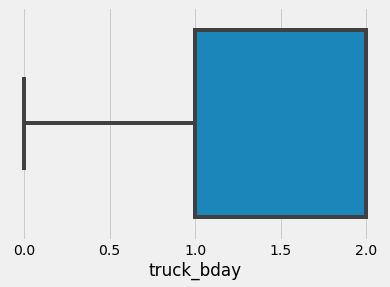

In [290]:
sns.boxplot(total['truck_bday'])

In [271]:
# total['scan_bday'] = [len(pd.bdate_range(total['on_truck_scan_date'][i], total['arrival_scan_date'][i])) - 1 for i in total.index.values]


In [272]:
# sns.boxenplot(data=total, x=['bday_x', 'truck_bday', 'scan_bday'], y=['bday_x', 'truck_bday', 'scan_bday'])
# sns.barplot([['bday_x', 'truck_bday', 'scan_bday'], [2.526316, 1.410526, 2.852632]])

In [274]:
# order_intern['delay_days'] = np.where(order_intern['is_delayed'] == 'yes', order_intern['ready_to_ship_length'] - 4, 0)
# order_intern

In [275]:
# colors = sns.color_palette('pastel')
# sns.countplot(order_intern['delay_days']);
# sns.countplot(data= order_intern, x = 'delay_days');


In [ ]:

plt.pie(order_intern['delay_days'].value_counts(), colors=['red', 'green', 'blue', 'yellow', 'black'], autopct='%.0f%%');


In [ ]:
mean_delay_intern = order_intern['delay_days'][order_intern['delay_days'] > 0].mean()
mean_delay_intern

In [ ]:

# order_intern['ready_to_ship_length'] = order_intern['ready_to_ship_length'].apply(lambda x: (x))
# order_intern['ready_to_ship_length'].plot(kind='hist')
sns.countplot(x=order_intern['ready_to_ship_length']);



In [ ]:
process.head()
process['on_truck_order_diff'] = process.on_truck_scan_date - process.order_date
process.sort_values('on_truck_order_diff')

In [ ]:
# correlation matrix between these variables
# corr_columns=["views", "likes", "dislikes", "comment_count", "trending_days_difference"]
# corr_mtrx=df[corr_columns].corr()
# corr_mtrx

In [ ]:
# draw the heatmap 
# plt.figure(figsize = (14,12))
# ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')